# Data preprocessing and EDA

In [2]:
# Save this file in the name of the ML model you are using
import pandas as pd
import numpy as np
import os

In [3]:
# Website for the dataset:
# https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data?select=icml_face_data.csv
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
FILE_NAME = "emotions.csv" # Insert file name
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

In [5]:
data_path = ["../data"] # Insert data file path
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv(file_path)
data = data.drop(index=WHITE_IMAGES, axis=0)

data.drop('Usage', axis=1, inplace=True)

data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/emotions.csv'

In [4]:
data.shape

(35875, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35875 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35875 non-null  int64 
 1   pixels   35875 non-null  object
dtypes: int64(1), object(1)
memory usage: 840.8+ KB


In [6]:
data.describe()

,emotion
count,35875.000000
mean,3.323819
std,1.873466
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [7]:
from collections import Counter

print('number of samples: ', len(data))
print('number of unique samples: ', len(data[data.columns[1]].unique()))
print('keys: ', list(data.keys()))
print('\n')

for i in range(len(CLASS_NAMES)):
    print(CLASS_NAMES[i] + ' ', ((data['emotion'].value_counts())[i]))


number of samples:  35875
number of unique samples:  34033
keys:  ['emotion', 'pixels']


Angry  4946
Disgust  547
Fear  5120
Happy  8988
Sad  6076
Surprise  4001
Neutral  6197


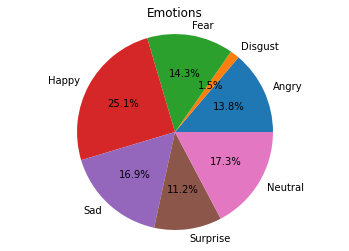

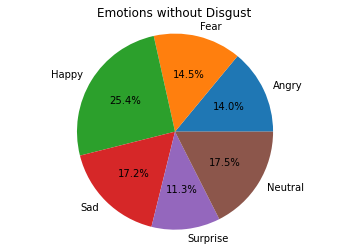

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
data_Angry = data[data['emotion'] == 0]
data_Disgust = data[data['emotion'] == 1]
data_Fear = data[data['emotion'] == 2]
data_Happy = data[data['emotion'] == 3]
data_Sad = data[data['emotion'] == 4]
data_Surprise = data[data['emotion'] == 5]
data_Neutral = data[data['emotion'] == 6]

sizes = [data_Angry.shape[0], data_Disgust.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=CLASS_NAMES, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions')


plt.show()

sizes = [data_Angry.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]
labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions without Disgust')


plt.show()

In [9]:
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust
data_exclude_disgust.shape

(35328, 2)

In [10]:
data_exclude_disgust = data_exclude_disgust.replace({
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
})

In [11]:
data_exclude_disgust.emotion.unique()

array([0, 1, 3, 5, 2, 4])

In [12]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data["pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [13]:
X,y = data_X_y(data_exclude_disgust)

In [14]:
print(X.max())
print(X.shape)
print(X.min(), X.max())
print(y.shape)
print(y.unique())

1.0
(35328, 48, 48, 1)
0.0 1.0
(35328,)
[0 1 3 5 2 4]


In [15]:
from skimage.io import imread
from skimage.transform import resize

def show_samples(X):
    # Array with all the unique emotions
    labels = np.unique(data_exclude_disgust['emotion'])

    fig, axes = plt.subplots(6, len(labels))
    fig.set_size_inches(15,10)
    fig.tight_layout()

    for ax, label in zip(axes, labels):
        i = 0 # starting point
        for a in ax:
            # A list with a the index for the corresponding emotion
            data_label_index_list = data_exclude_disgust.index[data_exclude_disgust['emotion'] == label].tolist()

            a.imshow(X[data_label_index_list[i]])
            a.axis('off')
            a.set_title(CLASS_NAMES_WITHOUT_DISGUST[label])
            i=i+1


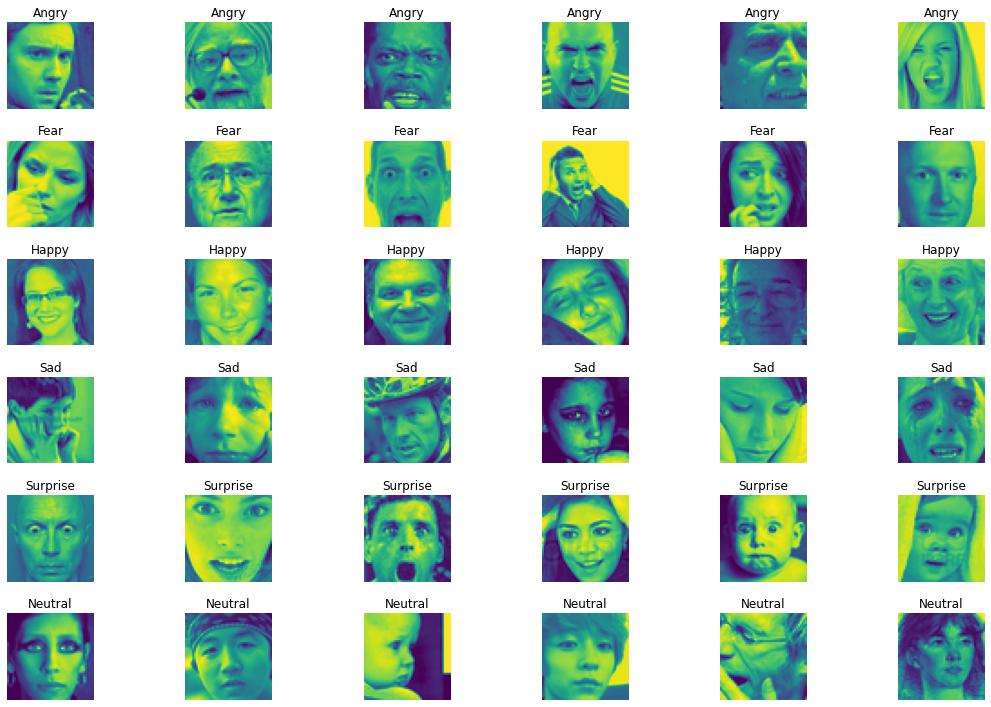

In [16]:
show_samples(X)

In [17]:
from skimage.feature import hog
from skimage.io import imread

def show_hog_samples(X):
    labels = np.unique(data_exclude_disgust['emotion'])

    fig, axes = plt.subplots(1, len(labels))
    fig.set_size_inches(15,4)
    fig.tight_layout()

    for ax, label in zip(axes, labels):

        data_label_index_list = data_exclude_disgust.index[data_exclude_disgust['emotion'] == label].tolist()
        
        # The values below can be changes to decrease or increase the amount of details
        emotion_hog, emotion_hog_img = hog(
        X[data_label_index_list[0]],
        pixels_per_cell=(2, 2),
        cells_per_block=(2, 2), 
        orientations=9, 
        visualize=True, 
        block_norm='L2-Hys')
        
        ax.imshow(emotion_hog_img)
        ax.axis('off')
        ax.set_title(CLASS_NAMES_WITHOUT_DISGUST[label])

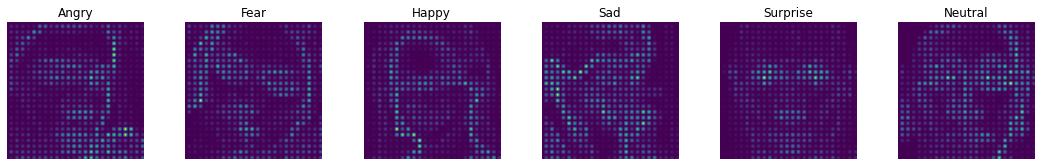

In [18]:
show_hog_samples(X)

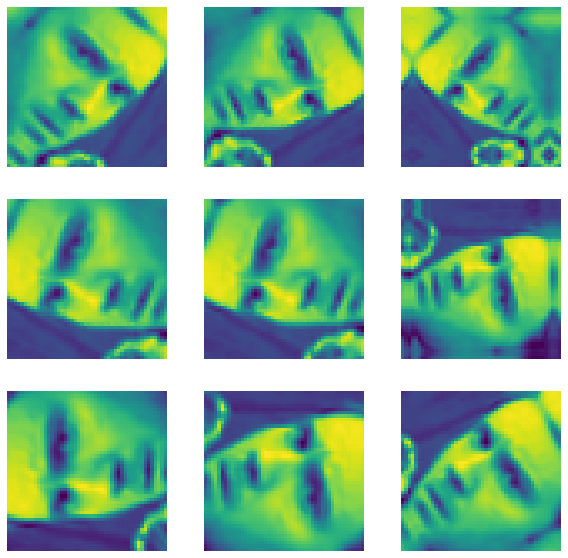

In [19]:
import tensorflow as tf
from tensorflow.keras import layers

# For more you can visit:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.25),
])

image = tf.expand_dims(X[0], 0) # X[0] can be changed to view different images

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

##### Added tqdm to view progress for when the code execution takes a long time

In [20]:
from tqdm import tqdm
def join_list(list_pixels):
    # Creates a string from the list of pixels
    final_str = ' '.join(str(int(v)) for v in list_pixels)
    return final_str

def create_csv_data_augmentation(X, y, copies):
    # Creates new dataframe
    column_names = ["emotion", "pixels", "Original"]
    data_augmentated = pd.DataFrame(columns = column_names)
    
    for image,emotion in tqdm(zip(X,y)):
        # Adds the original image to the dataframe converted to a string
        image_array = list((np.array(image)).flat)
        image_string = join_list(image_array)
        new_row = {'emotion':emotion, 'pixels':image_string, 'Original':True}
        data_augmentated = data_augmentated.append(new_row,ignore_index=True)
        image_expand = tf.expand_dims(image, 0)

        for i in range(copies): # tqdm to view progress
            # Adds the augmented image to the dataframe converted to a string
            augmented_image = data_augmentation(image_expand)
            augmented_image = list((np.array(augmented_image[0])).flat)
            augmented_image_string = join_list(augmented_image)
            new_row = {'emotion':emotion, 'pixels':augmented_image_string, 'Original':False}
            data_augmentated = data_augmentated.append(new_row, ignore_index=True)
    
    # Saves the dataframe to a csv file and in the title the amount of corresponding data augmentations
    save_data_augmentated_filepath = ('data/face_augmentated_{}'.format(copies))
    data_augmentated.to_csv(save_data_augmentated_filepath + '.csv', index = False)

    return data_augmentated

In [21]:
# # You can adjust the last value to choose how many unique copies you want to make
# # The higher the copies the longer the run time
# data_aug = create_csv_data_augmentation((X*255.0), y, 1) 

In [22]:
# # For when the file is created
FILE_NAME_AUG = "face_augmentated_1.csv" # Update name
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug = pd.read_csv(file_path_aug)

In [23]:
data_aug.shape

(70656, 3)

In [24]:
data_aug.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,61 73 94 116 127 131 133 135 137 137 138 140 1...,False
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,True
3,0,131 128 112 114 135 149 147 130 131 138 146 15...,False
4,2,231 212 156 164 174 138 161 173 182 200 106 38...,True


In [25]:
data_aug.drop('Original', axis=1, inplace=True)
X_aug, y_aug = data_X_y(data_aug)
y_aug = y_aug.astype('int32')

print(X_aug.shape)
print(y_aug.shape)

(70656, 48, 48, 1)
(70656,)


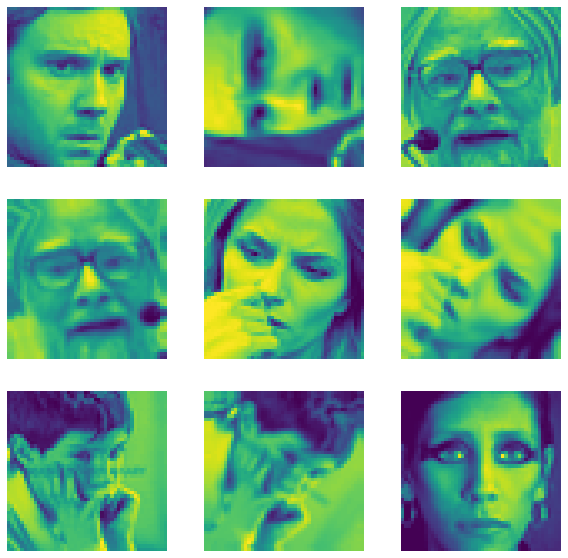

In [26]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_aug[i])
    plt.axis("off")

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])


In [28]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import skimage

def hogify_X(X):
    hogify = HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2,2), 
        orientations=9, 
        block_norm='L2-Hys'
    )

    X_hog = hogify.fit_transform(X)

    return X_hog

In [29]:
X_hog = hogify_X(X) # This can be used for fitting a model faster with less data but still good in quality, test it with the other data samples
print(X_hog.shape)

(35328, 144)


In [30]:
from builtins import range
from builtins import object

def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [31]:
print(X.shape)
X = reshape_X(X)
print(X.shape)

(35328, 48, 48, 1)
(35328, 2304)


In [32]:
print(X_aug.shape)
X_aug = reshape_X(X_aug)
print(X_aug.shape)

(70656, 48, 48, 1)
(70656, 2304)


In [33]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE()

X_rus, y_rus = rus.fit_resample(X,y) # This data is undersampled
X_ros, y_ros = ros.fit_resample(X,y) # This data is oversampled
X_smote, y_smote = smote.fit_resample(X,y) # This data is oversampled with smote

print(y_rus.value_counts())
print(y_ros.value_counts())
print(y_smote.value_counts())

5    4001
4    4001
3    4001
2    4001
1    4001
0    4001
Name: emotion, dtype: int64
5    8988
4    8988
3    8988
2    8988
1    8988
0    8988
Name: emotion, dtype: int64
5    8988
4    8988
3    8988
2    8988
1    8988
0    8988
Name: emotion, dtype: int64


In [34]:
# Checks the unique rows in the array for smote, ros & rus
print(len(X_smote))
print(len(np.unique(X_smote, axis=0)))
print(len(X_ros))
print(len(np.unique(X_ros, axis=0)))
print(len(X_rus))
print(len(np.unique(X_rus, axis=0)))

53928
51435
53928
33575
24006
22748


In [35]:
X_aug_smote, y_aug_smote = smote.fit_resample(X_aug,y_aug) # This data is oversampled with smote
X_aug_ros, y_aug_ros = ros.fit_resample(X_aug,y_aug) # This data is oversampled
X_aug_rus, y_aug_rus = rus.fit_resample(X_aug,y_aug) # This data is undersampled

print(y_aug_rus.value_counts())
print(y_aug_ros.value_counts())
print(y_aug_smote.value_counts())

6    8002
5    8002
4    8002
3    8002
2    8002
0    8002
Name: emotion, dtype: int64
6    17976
5    17976
4    17976
3    17976
2    17976
0    17976
Name: emotion, dtype: int64
6    17976
5    17976
4    17976
3    17976
2    17976
0    17976
Name: emotion, dtype: int64


In [36]:
def plot_train_test_distribution(y,loc='left', relative=True):
    width = 0.35
    CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, CLASS_NAMES_WITHOUT_DISGUST, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    plt.suptitle('relative amount of images per type')
    

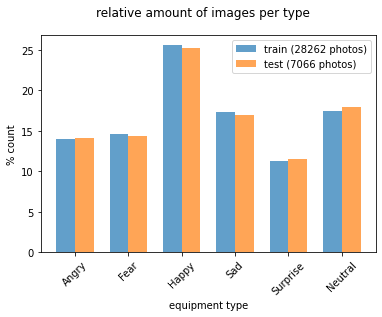

In [37]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

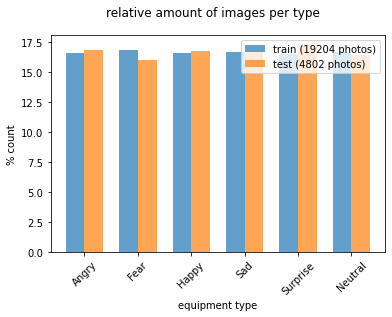

In [38]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(
    X_rus, 
    y_rus, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_rus, loc='left')
plot_train_test_distribution(y_test_rus, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_rus)), 
    'test ({0} photos)'.format(len(y_test_rus))
]);

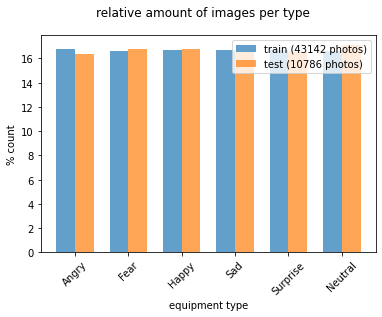

In [39]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_ros, 
    y_ros, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_ros, loc='left')
plot_train_test_distribution(y_test_ros, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_ros)), 
    'test ({0} photos)'.format(len(y_test_ros))
]);

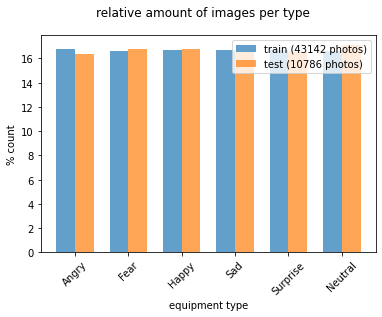

In [40]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, 
    y_smote, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_smote, loc='left')
plot_train_test_distribution(y_test_smote, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_smote)), 
    'test ({0} photos)'.format(len(y_test_smote))
]);

In [41]:
# These are the X & y that can be used for fitting a ML model
X_train, X_test, y_train, y_test
X_train_rus, X_test_rus, y_train_rus, y_test_rus
X_train_ros, X_test_ros, y_train_ros, y_test_ros
X_train_smote, X_test_smote, y_train_smote, y_test_smote
X_hog, y # This does still have to be ros, rus or smote for balance and then split in to train & test

(array([[0.20994851, 0.25951439, 0.25951439, ..., 0.07401445, 0.05536962,
         0.12145643],
        [0.14957843, 0.23828312, 0.23828312, ..., 0.17031329, 0.06625583,
         0.17081747],
        [0.27776439, 0.31917925, 0.31917925, ..., 0.00551356, 0.01571592,
         0.03699339],
        ...,
        [0.09830001, 0.12822649, 0.09877445, ..., 0.03969169, 0.04229507,
         0.06040726],
        [0.28066807, 0.2134875 , 0.03435179, ..., 0.02950318, 0.00908859,
         0.03940427],
        [0.15730592, 0.24617036, 0.24617036, ..., 0.07038143, 0.03730191,
         0.08617894]]),
 0        0
 1        0
 2        1
 3        3
 4        5
         ..
 35882    5
 35883    2
 35884    0
 35885    2
 35886    1
 Name: emotion, Length: 35328, dtype: int64)

In [42]:
# This is the augmented dataset
# Has to be train & test split before use
X_aug_smote, y_aug_smote
X_aug_ros, y_aug_ros
X_aug_rus, y_aug_rus

(array([[0.45490196, 0.45882353, 0.43921569, ..., 0.54509804, 0.6745098 ,
         0.78039216],
        [0.54117647, 0.54117647, 0.59215686, ..., 0.34901961, 0.41960784,
         0.48627451],
        [0.47843137, 0.37647059, 0.22352941, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.10196078, 0.09411765, 0.10980392, ..., 0.12941176, 0.12941176,
         0.14509804],
        [0.08235294, 0.07058824, 0.0627451 , ..., 0.4       , 0.41960784,
         0.51372549],
        [0.58039216, 0.60784314, 0.63529412, ..., 0.8627451 , 0.72941176,
         0.65098039]]),
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 48007    6
 48008    6
 48009    6
 48010    6
 48011    6
 Name: emotion, Length: 48012, dtype: int32)

# Training the CNN models

##### The plan of action is:
1. Use the default parameters of CNN models to see where we are starting from by using the raw data which is only normalized (more on that later)
2. Increase the performance of the model by tweaking the hyperparameters.
3. After having found the right parameters we can start feature engineering the data to increase the performance of the models.

# Imports

In [48]:
from keras.models import Model
import keras
import csv
from PIL import Image    
from sklearn.model_selection import train_test_split
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D,BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras import regularizers
import numpy as np # linear algebra
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
import collections
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import os

##### The **es_callback** stops the training of the model when the loss doesn't decrease after 3 epochs so we don't waste time in training a bad model

In [49]:
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# CNN default model 1 trained on raw normalized data

In [50]:
X_train = X_train.reshape(len(X_train), 48, 48, 1)
X_test = X_test.reshape(len(X_test), 48, 48, 1)

##### These are the default parameters used in this model without using any padding, regularization and using the default learning rate of Adam (0.001) etc to understand what impact adding padding, changing learning rates, adding more layers will have on the model.

In [55]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), activation = "relu", input_shape = input_shape),
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Activation("relu"),
    Dense(128),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 64)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 67712)             0         
_________________________________________________________________
activation_4 (Activation)    (None, 67712)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8667264   
_________________________________________________________________
dense_10 (Dense)             (None, 6)                

##### The training stopped because the loss didn't decrease after 3 epochs. We can also see that the model was too simple to be able to learn the complexities of classifying the emotions. The model also got trained on the normalized images, which means the pixel values all got converted between 0 and 1 to reduce training time.

In [56]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train)/128,
                    validation_data = (X_test, y_test),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModelx-1")

Epoch 1/50
220/220 [==============================] - 45s 200ms/step - loss: 2.1645 - accuracy: 0.2575 - val_loss: 1.6290 - val_accuracy: 0.3445
Epoch 2/50
220/220 [==============================] - 42s 189ms/step - loss: 1.6302 - accuracy: 0.3399 - val_loss: 1.5802 - val_accuracy: 0.3716
Epoch 3/50
220/220 [==============================] - 45s 205ms/step - loss: 1.5828 - accuracy: 0.3815 - val_loss: 1.5782 - val_accuracy: 0.3624
Epoch 4/50
220/220 [==============================] - 44s 200ms/step - loss: 1.5380 - accuracy: 0.3946 - val_loss: 1.4968 - val_accuracy: 0.4165
Epoch 5/50
220/220 [==============================] - 42s 191ms/step - loss: 1.4466 - accuracy: 0.4402 - val_loss: 1.4844 - val_accuracy: 0.4196
Epoch 6/50
220/220 [==============================] - 42s 192ms/step - loss: 1.4519 - accuracy: 0.4331 - val_loss: 1.4880 - val_accuracy: 0.4240
Epoch 7/50
220/220 [==============================] - 43s 196ms/step - loss: 1.4397 - accuracy: 0.4426 - val_loss: 1.4511 - val_ac

# CNN default model 2 trained on raw normalized data

##### In the second model we added an extra convolutional layer with 256 filters and a kernel_size of (3, 3). And a MaxPooling layer after the convolutional layers to reduce the spatial dimensions of the output volume which reduces computational load.

In [56]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), activation = "relu", input_shape = input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Activation("relu"),
    Dense(128),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 64)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

##### The training stopped again quite fast because the loss didn't decrease after 3 epochs. And the accuracy wasn't much better than the previous model.

In [57]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train)/128,
                    validation_data = (X_test, y_test),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModelx-2")

Epoch 1/50
220/220 [==============================] - 20s 87ms/step - loss: 1.7624 - accuracy: 0.2462 - val_loss: 1.7021 - val_accuracy: 0.2785
Epoch 2/50
220/220 [==============================] - 19s 85ms/step - loss: 1.6831 - accuracy: 0.3028 - val_loss: 1.6399 - val_accuracy: 0.3306
Epoch 3/50
220/220 [==============================] - 19s 87ms/step - loss: 1.6310 - accuracy: 0.3416 - val_loss: 1.5911 - val_accuracy: 0.3637
Epoch 4/50
220/220 [==============================] - 19s 85ms/step - loss: 1.5725 - accuracy: 0.3792 - val_loss: 1.5268 - val_accuracy: 0.3992
Epoch 5/50
220/220 [==============================] - 19s 88ms/step - loss: 1.5189 - accuracy: 0.4077 - val_loss: 1.5205 - val_accuracy: 0.3984
Epoch 6/50
220/220 [==============================] - 19s 87ms/step - loss: 1.4989 - accuracy: 0.4145 - val_loss: 1.4789 - val_accuracy: 0.4183
Epoch 7/50
220/220 [==============================] - 20s 90ms/step - loss: 1.4820 - accuracy: 0.4141 - val_loss: 1.4769 - val_accuracy:

# CNN default model 3 trained on raw normalized data

##### The difference between this model and the previous one is that this one has padding implemented with as parameters "same" to keep the original input size because when the image shrinks too much the information may become meaningless. Which may be the reason why the accuracy is so low.

In [58]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), padding = "same", activation = "relu", input_shape = input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), padding = "same", activation = "relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Activation("relu"),
    Dense(128),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 64)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)             

##### Implementing the padding has had a good impact in reducing the loss by ~1100 and increasing the training accuracy by ~5%. This is because the complexities in the images were lost at first because the image size shrank.

In [59]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train)/128,
                    validation_data = (X_test, y_test),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModelx-3")

Epoch 1/50
220/220 [==============================] - 28s 125ms/step - loss: 1.7793 - accuracy: 0.2487 - val_loss: 1.7285 - val_accuracy: 0.2637
Epoch 2/50
220/220 [==============================] - 25s 115ms/step - loss: 1.7162 - accuracy: 0.2803 - val_loss: 1.6442 - val_accuracy: 0.3327
Epoch 3/50
220/220 [==============================] - 24s 111ms/step - loss: 1.6480 - accuracy: 0.3270 - val_loss: 1.5925 - val_accuracy: 0.3549
Epoch 4/50
220/220 [==============================] - 25s 114ms/step - loss: 1.5741 - accuracy: 0.3701 - val_loss: 1.5450 - val_accuracy: 0.3844
Epoch 5/50
220/220 [==============================] - 25s 112ms/step - loss: 1.5208 - accuracy: 0.4033 - val_loss: 1.5098 - val_accuracy: 0.3980
Epoch 6/50
220/220 [==============================] - 25s 113ms/step - loss: 1.4869 - accuracy: 0.4250 - val_loss: 1.4692 - val_accuracy: 0.4260
Epoch 7/50
220/220 [==============================] - 25s 111ms/step - loss: 1.4764 - accuracy: 0.4174 - val_loss: 1.4647 - val_ac

# CNN default model 4 trained on raw normalized data

##### The accuracy of the models so far is very low and the loss is still too high. Since the accuracy so far of the models is ~46%, the model isn't able to capture the different complexities each emotion has. This is why for this model we will double the the number of nodes in the last layer to 256 to see whether the model will be able to learn the complexities.

In [60]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), padding = "same", activation = "relu", input_shape = input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), padding = "same", activation = "relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Activation("relu"),
    Dense(256),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 48, 48, 64)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)             

##### Doubling the nodes in the last layer has had a negative impact on the loss and training accuracy as we can see below. The reason why the model isn't performing well might be because during each step the batch size is too small which may cause the model to update the weights too fast before it is being able to learn the complexities.

In [61]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train)/128,
                    validation_data = (X_test, y_test),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModelx-4")

Epoch 1/50
220/220 [==============================] - 26s 117ms/step - loss: 1.8006 - accuracy: 0.2650 - val_loss: 1.7175 - val_accuracy: 0.2678
Epoch 2/50
220/220 [==============================] - 27s 120ms/step - loss: 1.7077 - accuracy: 0.2804 - val_loss: 1.6340 - val_accuracy: 0.3382
Epoch 3/50
220/220 [==============================] - 25s 112ms/step - loss: 1.6414 - accuracy: 0.3283 - val_loss: 1.5982 - val_accuracy: 0.3419
Epoch 4/50
220/220 [==============================] - 29s 132ms/step - loss: 1.5766 - accuracy: 0.3679 - val_loss: 1.5443 - val_accuracy: 0.3852
Epoch 5/50
220/220 [==============================] - 30s 136ms/step - loss: 1.5458 - accuracy: 0.3955 - val_loss: 1.5293 - val_accuracy: 0.3903
Epoch 6/50
220/220 [==============================] - 29s 130ms/step - loss: 1.5156 - accuracy: 0.4023 - val_loss: 1.5134 - val_accuracy: 0.4031
Epoch 7/50
220/220 [==============================] - 28s 127ms/step - loss: 1.5111 - accuracy: 0.3962 - val_loss: 1.4983 - val_ac

# CNN default model 5 trained on raw normalized data

##### In this model we will double the batch size to test whether the model will be able to perform better by updating the weights after it has iterated over 64 examples each time.

In [46]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), padding = "same", activation = "relu", input_shape = input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), padding = "same", activation = "relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Activation("relu"),
    Dense(256),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)             

##### Looking at the results of model x-5 we can see that doubling the batch size has increased the performance a lot. The loss has changed from ~1.3 to ~0.83 and the training accuracy has increased from ~48% to ~67%. But the test accuracy is still ~46%. Which means the model has difficulty generalizing, this means the model might be overfitting.

In [49]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size = 64, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train)/128,
                    validation_data = (X_test, y_test),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModelx-5")

Epoch 1/50
220/220 [==============================] - 36s 160ms/step - loss: 1.7845 - accuracy: 0.2606 - val_loss: 1.6741 - val_accuracy: 0.3138
Epoch 2/50
220/220 [==============================] - 35s 157ms/step - loss: 1.6539 - accuracy: 0.3205 - val_loss: 1.5791 - val_accuracy: 0.3722
Epoch 3/50
220/220 [==============================] - 37s 166ms/step - loss: 1.5590 - accuracy: 0.3856 - val_loss: 1.5178 - val_accuracy: 0.4072
Epoch 4/50
220/220 [==============================] - 37s 169ms/step - loss: 1.5206 - accuracy: 0.3919 - val_loss: 1.4914 - val_accuracy: 0.4089
Epoch 5/50
220/220 [==============================] - 37s 168ms/step - loss: 1.4722 - accuracy: 0.4253 - val_loss: 1.4662 - val_accuracy: 0.4240
Epoch 6/50
220/220 [==============================] - 37s 167ms/step - loss: 1.4614 - accuracy: 0.4308 - val_loss: 1.4479 - val_accuracy: 0.4367
Epoch 7/50
220/220 [==============================] - 38s 170ms/step - loss: 1.3950 - accuracy: 0.4509 - val_loss: 1.4047 - val_ac

# CNN default model 6 trained on raw normalized data

##### A way to have the model overfit less is to use dropout. Since I plan to make the neural network a bit bigger, using dropout adds more randomness to the model which may result in a better model.

In [54]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), padding = "same", activation = "relu", input_shape = input_shape),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), padding = "same", activation = "relu"),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Flatten(),
    Activation("relu"),
    Dense(256),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 64)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 256)      

##### Adding the dropout has reduced the training accuracy by ~10% and there doesn't to be any changes in the testing accuracy. A reason for this could be that the model isn't big enough which led to decreasing the performance of the model when adding the dropout.

In [55]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size = 64, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train)/128,
                    validation_data = (X_test, y_test),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModelx-6")

Epoch 1/50
220/220 [==============================] - 54s 240ms/step - loss: 1.8627 - accuracy: 0.2594 - val_loss: 1.6913 - val_accuracy: 0.3227
Epoch 2/50
220/220 [==============================] - 56s 252ms/step - loss: 1.6402 - accuracy: 0.3346 - val_loss: 1.6274 - val_accuracy: 0.3749
Epoch 3/50
220/220 [==============================] - 52s 238ms/step - loss: 1.5752 - accuracy: 0.3803 - val_loss: 1.6011 - val_accuracy: 0.3626
Epoch 4/50
220/220 [==============================] - 53s 241ms/step - loss: 1.5634 - accuracy: 0.3703 - val_loss: 1.5739 - val_accuracy: 0.3970
Epoch 5/50
220/220 [==============================] - 52s 235ms/step - loss: 1.5401 - accuracy: 0.3938 - val_loss: 1.5460 - val_accuracy: 0.3948
Epoch 6/50
220/220 [==============================] - 52s 236ms/step - loss: 1.5177 - accuracy: 0.4094 - val_loss: 1.5621 - val_accuracy: 0.3753
Epoch 7/50
220/220 [==============================] - 53s 242ms/step - loss: 1.4836 - accuracy: 0.4154 - val_loss: 1.5393 - val_ac

# CNN default model 7 trained on raw normalized data

##### For this model we will add an extra layer with 128 nodes to make the model a bit bigger to see whether using Dropout will help the model from overfitting.

In [56]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), padding = "same", activation = "relu", input_shape = input_shape),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), padding = "same", activation = "relu"),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128),
    Activation("relu"),
    Dropout(.25),
    Dense(256),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 64)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 128)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 256)      

##### Compared to the previous model this model performed better on the training data by an increase in accuracy of ~11% and an increase in the testing data by ~4%. But the model is still overfitting which results in a low testing accuracy as we can see. In the next model we will try Batchnormalization (more on that later). 

In [57]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size = 64, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train)/128,
                    validation_data = (X_test, y_test),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModelx-7")

Epoch 1/50
220/220 [==============================] - 60s 268ms/step - loss: 1.7700 - accuracy: 0.2501 - val_loss: 1.7088 - val_accuracy: 0.2710
Epoch 2/50
220/220 [==============================] - 61s 278ms/step - loss: 1.6575 - accuracy: 0.3144 - val_loss: 1.6011 - val_accuracy: 0.3648
Epoch 3/50
220/220 [==============================] - 59s 265ms/step - loss: 1.5646 - accuracy: 0.3777 - val_loss: 1.5716 - val_accuracy: 0.3648
Epoch 4/50
220/220 [==============================] - 61s 276ms/step - loss: 1.5262 - accuracy: 0.3888 - val_loss: 1.5372 - val_accuracy: 0.4032
Epoch 5/50
220/220 [==============================] - 64s 290ms/step - loss: 1.4815 - accuracy: 0.4096 - val_loss: 1.4674 - val_accuracy: 0.4138
Epoch 6/50
220/220 [==============================] - 61s 275ms/step - loss: 1.4642 - accuracy: 0.4166 - val_loss: 1.4878 - val_accuracy: 0.4038
Epoch 7/50
220/220 [==============================] - 62s 282ms/step - loss: 1.4066 - accuracy: 0.4458 - val_loss: 1.4310 - val_ac

# CNN default model 8 trained on raw normalized data

##### For this model we will add BatchNormalization after every layer but the last to make the layers of the network do the learning more independently. This way we can normalize the output of the previous layers which makes training a bit faster and it also works as a regularization method which will help the model from overfitting as well.

In [59]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), padding = "same", activation = "relu", input_shape = input_shape),
    BatchNormalization(),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    BatchNormalization(),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), padding = "same", activation = "relu"),
    BatchNormalization(),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128),
    Activation("relu"),
    Dropout(.25),
    Dense(256),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 48, 48, 64)        128       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 128)      

##### Looking at the results we can see that adding the BatchNormalization didn't improve the model even after the maximum 50 epochs. So for the next model we will undo the last step and increase the number of epochs to 100 and add L2 regularization because we don't need to compress the models by having the L1 regularization reduce the weights to 0.

In [60]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size = 64, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train)/128,
                    validation_data = (X_test, y_test),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModelx-8")

Epoch 1/50
220/220 [==============================] - 81s 362ms/step - loss: 2.5339 - accuracy: 0.2466 - val_loss: 3.4954 - val_accuracy: 0.2516
Epoch 2/50
220/220 [==============================] - 82s 371ms/step - loss: 1.7417 - accuracy: 0.2463 - val_loss: 2.2145 - val_accuracy: 0.2511
Epoch 3/50
220/220 [==============================] - 78s 354ms/step - loss: 1.7197 - accuracy: 0.2525 - val_loss: 1.7053 - val_accuracy: 0.2788
Epoch 4/50
220/220 [==============================] - 80s 361ms/step - loss: 1.7075 - accuracy: 0.2596 - val_loss: 1.7107 - val_accuracy: 0.2495
Epoch 5/50
220/220 [==============================] - 79s 359ms/step - loss: 1.6856 - accuracy: 0.2754 - val_loss: 1.7151 - val_accuracy: 0.2947
Epoch 6/50
220/220 [==============================] - 78s 354ms/step - loss: 1.6838 - accuracy: 0.2766 - val_loss: 1.6866 - val_accuracy: 0.2883
Epoch 7/50
220/220 [==============================] - 78s 353ms/step - loss: 1.6690 - accuracy: 0.2828 - val_loss: 1.7091 - val_ac

# CNN default model 9 trained on raw normalized data

##### In this model we add the L2 regulizer in every every to reduce the overfitting of the models.

In [51]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), padding = "same", activation = "relu", input_shape = input_shape, kernel_regularizer = regularizers.l2(l = 0.01)),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = "same", activation = "relu", kernel_regularizer = regularizers.l2(l = 0.01)),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), padding = "same", activation = "relu", kernel_regularizer = regularizers.l2(l = 0.01)),
    Dropout(.25),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, kernel_regularizer = regularizers.l2(l = 0.01)),
    Activation("relu"),
    Dropout(.25),
    Dense(256, kernel_regularizer = regularizers.l2(l = 0.01)),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        128       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)      

##### Adding the L2 regularization has given the worst performance so far. The model stopped improving after 6 epochs. A reason for this could be that it regulized too much which resulted in the model not being able to learn to classify the emotions.

In [52]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size = 64, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train)/128,
                    validation_data = (X_test, y_test),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModelx-9")

Epoch 1/50
220/220 [==============================] - 64s 286ms/step - loss: 3.7537 - accuracy: 0.2446 - val_loss: 1.7866 - val_accuracy: 0.2516
Epoch 2/50
220/220 [==============================] - 63s 286ms/step - loss: 1.7789 - accuracy: 0.2433 - val_loss: 1.7624 - val_accuracy: 0.2516
Epoch 3/50
220/220 [==============================] - 64s 291ms/step - loss: 1.7605 - accuracy: 0.2535 - val_loss: 1.7609 - val_accuracy: 0.2516
Epoch 4/50
220/220 [==============================] - 63s 285ms/step - loss: 1.7605 - accuracy: 0.2541 - val_loss: 1.7623 - val_accuracy: 0.2516
Epoch 5/50
220/220 [==============================] - 61s 277ms/step - loss: 1.7661 - accuracy: 0.2478 - val_loss: 1.7620 - val_accuracy: 0.2516
Epoch 6/50
220/220 [==============================] - 63s 287ms/step - loss: 1.7583 - accuracy: 0.2512 - val_loss: 1.7619 - val_accuracy: 0.2516
Epoch 7/50
220/220 [==============================] - 64s 290ms/step - loss: 1.7566 - accuracy: 0.2572 - val_loss: 1.7602 - val_ac

# CNN Model trained on oversampled data with test accuracy of 77%

##### For this model we are going to use the hyperparameters which gave the best results so for and combine them. In this model we are also going to train on the oversampled data to have the model iterate through more images so that it learns to differentiate between the difficult emotions as well like the surprised and happy faces which are difficult to distinguish.

In [46]:
X_train_ros = X_train_ros.reshape(len(X_train_ros), 48, 48, 1)

In [47]:
X_test_ros = X_test_ros.reshape(len(X_test_ros), 48, 48, 1)

In [61]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), padding = "same", activation = "relu", input_shape = input_shape),
    BatchNormalization(),
    Dropout(.25),
    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    BatchNormalization(),
    Dropout(.25),
    Conv2D(256, (5, 5), padding = "same", activation = "relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding = "same"),
    Dropout(.25),
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation("relu"),
    Dropout(.25),
    Dense(256),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        128       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 256)      

##### Looking the results we can see that the model performed great since the training and test accuracy has increased a lot. Using the randomoversampled data has had a good impact in improving the model.

In [62]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.006),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train_ros, y_train_ros, 
                    batch_size = 64, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train_ros)/128,
                    validation_data = (X_test_ros, y_test_ros),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModel3")

Epoch 1/50
337/337 [==============================] - 1238s 4s/step - loss: 1.9026 - accuracy: 0.2551 - val_loss: 1.7884 - val_accuracy: 0.2426
Epoch 2/50
337/337 [==============================] - 1157s 3s/step - loss: 1.4974 - accuracy: 0.3944 - val_loss: 1.3727 - val_accuracy: 0.4495
Epoch 3/50
337/337 [==============================] - 1149s 3s/step - loss: 1.2642 - accuracy: 0.5055 - val_loss: 1.2206 - val_accuracy: 0.5421
Epoch 4/50
337/337 [==============================] - 1196s 4s/step - loss: 1.1830 - accuracy: 0.5460 - val_loss: 1.1023 - val_accuracy: 0.5924
Epoch 5/50
337/337 [==============================] - 1284s 4s/step - loss: 0.9319 - accuracy: 0.6535 - val_loss: 1.0117 - val_accuracy: 0.6337
Epoch 6/50
337/337 [==============================] - 1198s 4s/step - loss: 0.8993 - accuracy: 0.6695 - val_loss: 0.9633 - val_accuracy: 0.6624
Epoch 7/50
337/337 [==============================] - 1224s 4s/step - loss: 0.6369 - accuracy: 0.7702 - val_loss: 0.9763 - val_accuracy:

In [52]:
model = tf.keras.models.load_model("models/CNNModel3")

/Users/abid/Directories/AI/emotion


In [57]:
# pip install python-resize-image
from resizeimage import resizeimage
from PIL import Image, ImageOps

def import_test_sample(test_path):
    with open(test_path, 'r+b') as f:
        with Image.open(f) as image:
            test_image = resizeimage.resize_cover(image, [48,48])

    test_image = ImageOps.grayscale(test_image)

    test_image = np.array(test_image)
    test_image = test_image.astype("int32")
    test_image = test_image/255.0
    test_image = test_image.reshape(48, 48, 1)
    plt.imshow(test_image)
    print(test_image.shape)
    
    return test_image


# CNN model trained on smote data with test accuracy of 76 %

##### This model we will use smote because the previous model performed great on the ros data, maybe going a bit more complex in the feature engineering using smote it might improve the performance of the model a little bit more.

In [49]:
X_train_smote = X_train_smote.reshape(len(X_train_smote), 48, 48, 1)
X_test_smote = X_test_smote.reshape(len(X_test_smote), 48, 48, 1)

In [55]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), padding = "same", activation = "relu", input_shape = input_shape),
    BatchNormalization(),
    Dropout(.25),
    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    BatchNormalization(),
    Dropout(.25),
    Conv2D(256, (5, 5), padding = "same", activation = "relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding = "same"),
    Dropout(.25),
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation("relu"),
    Dropout(.25),
    Dense(256),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])

##### Looking at the results we can see that the performance of the model stayed pretty much the same by only looking at the accuracy. In the model testing in the Results section we might have a clearer insight whether the performance of this model truly is the same or not as the previous model.

In [56]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.006),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

history = model.fit(X_train_smote, y_train_smote, 
                    batch_size = 64, 
                    epochs = epochs, 
                    steps_per_epoch = len(X_train_smote)/128,
                    validation_data = (X_test_smote, y_test_smote),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModel4")

Epoch 1/50
337/337 [==============================] - 1546s 5s/step - loss: 1.8990 - accuracy: 0.2467 - val_loss: 1.7907 - val_accuracy: 0.2100
Epoch 2/50
337/337 [==============================] - 932s 3s/step - loss: 1.5017 - accuracy: 0.3866 - val_loss: 1.3520 - val_accuracy: 0.4524
Epoch 3/50
337/337 [==============================] - 889s 3s/step - loss: 1.2897 - accuracy: 0.4906 - val_loss: 1.2120 - val_accuracy: 0.5358
Epoch 4/50
337/337 [==============================] - 889s 3s/step - loss: 1.1899 - accuracy: 0.5365 - val_loss: 1.1498 - val_accuracy: 0.5566
Epoch 5/50
337/337 [==============================] - 887s 3s/step - loss: 0.9606 - accuracy: 0.6416 - val_loss: 1.0189 - val_accuracy: 0.6299
Epoch 6/50
337/337 [==============================] - 924s 3s/step - loss: 0.9472 - accuracy: 0.6502 - val_loss: 0.9891 - val_accuracy: 0.6412
Epoch 7/50
337/337 [==============================] - 976s 3s/step - loss: 0.6855 - accuracy: 0.7481 - val_loss: 0.9440 - val_accuracy: 0.678

In [57]:
model.evaluate(X_test_smote, y_test_smote)

338/338 [==============================] - 101s 300ms/step - loss: 1.1565 - accuracy: 0.7570


[1.1564974784851074, 0.7569997906684875]

# CNN model trained on aug data (1 copy) with test accuracy of  76%

##### This model will be trained on the augmented data to see how the performance of the model will differ from the previous models

In [50]:
y_aug_ros = y_aug_ros.replace({
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
})

In [51]:
X_train_aug_ros, X_test_aug_ros, y_train_aug_ros, y_test_aug_ros = train_test_split(
    X_aug_ros, 
    y_aug_ros, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

In [52]:
X_train_aug_ros.shape

(86284, 2304)

In [53]:
X_train_aug_ros = X_train_aug_ros.reshape(len(X_train_aug_ros), 48, 48, 1)
X_test_aug_ros = X_test_aug_ros.reshape(len(X_test_aug_ros), 48, 48, 1)

In [49]:
X_train_aug_ros.shape

(86284, 48, 48, 1)

In [50]:
tf.random.set_seed(42)
input_shape = (48, 48, 1)
model = models.Sequential([
    Conv2D(64, (1, 1), padding = "same", activation = "relu", input_shape = input_shape),
    BatchNormalization(),
    Dropout(.25),
    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    BatchNormalization(),
    Dropout(.25),
    Conv2D(256, (5, 5), padding = "same", activation = "relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding = "same"),
    Dropout(.25),
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation("relu"),
    Dropout(.25),
    Dense(256),
    Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")
])

##### This model has the same performance as the previous 2 models by looking at the accuracy only but in the model testing in the Results section we will have more clearance about whether that is true.

In [51]:
epochs = 50
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.006),  
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"]) 

history = model.fit(X_train_aug_ros, y_train_aug_ros, 
                    batch_size = 64,
                    epochs = epochs, 
                    steps_per_epoch = len(X_train_aug_ros)/128,
                    validation_data = (X_test_aug_ros, y_test_aug_ros),
                    callbacks = [es_callback, cp_callback])

model.save("CNNModel5")

Epoch 1/50
674/674 [==============================] - 1800s 3s/step - loss: 1.8661 - accuracy: 0.2268 - val_loss: 1.6403 - val_accuracy: 0.3092
Epoch 2/50
674/674 [==============================] - 1817s 3s/step - loss: 1.6199 - accuracy: 0.3224 - val_loss: 1.4894 - val_accuracy: 0.3971
Epoch 3/50
674/674 [==============================] - 2029s 3s/step - loss: 1.4596 - accuracy: 0.4152 - val_loss: 1.3594 - val_accuracy: 0.4599
Epoch 4/50
674/674 [==============================] - 1894s 3s/step - loss: 1.3856 - accuracy: 0.4518 - val_loss: 1.2903 - val_accuracy: 0.4944
Epoch 5/50
674/674 [==============================] - 1820s 3s/step - loss: 1.1749 - accuracy: 0.5479 - val_loss: 1.2383 - val_accuracy: 0.5357
Epoch 6/50
674/674 [==============================] - 1878s 3s/step - loss: 1.1514 - accuracy: 0.5565 - val_loss: 1.1009 - val_accuracy: 0.5922
Epoch 7/50
674/674 [==============================] - 1833s 3s/step - loss: 0.9010 - accuracy: 0.6640 - val_loss: 1.0798 - val_accuracy:

In [52]:
model.evaluate(X_test_aug_ros, y_test_aug_ros)

675/675 [==============================] - 195s 289ms/step - loss: 1.2992 - accuracy: 0.7497


[1.2991715669631958, 0.749721884727478]

# CNN model 6 using Transfer learning model with test accuracy of 65%

##### This model has been trained using transfer learning with Resnet50 to see whether this model would outperform the previous models.

In [45]:
from keras.applications.resnet50 import ResNet50
import cv2

In [46]:
def get_rgb_X(X):
    X = [cv2.cvtColor(np.float32(image), cv2.COLOR_GRAY2RGB) for image in X]
    return X

In [56]:
rgb_X_train_aug_ros = get_rgb_X(X_train_aug_ros)
rgb_X_test_aug_ros = get_rgb_X(X_test_aug_ros)

In [57]:
rgb_X_train_aug_ros = np.array(rgb_X_train_aug_ros)
rgb_X_test_aug_ros = np.array(rgb_X_test_aug_ros)

In [58]:
model = ResNet50(weights = "imagenet", include_top = False,
                 input_shape = (48, 48, 3))
X = model.output
X = Flatten()(X)
X = Dense(len(CLASS_NAMES_WITHOUT_DISGUST), activation = "softmax")(X)
model = Model(inputs = model.input, outputs = X)

In [59]:
model.compile(optimizer = "adam",
             loss = tf.keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])

##### By looking at the accuracy only the model hasn't performed as good as we might have hoped but at the model testing we will see whether that is true.

In [60]:
history = model.fit(rgb_X_train_aug_ros, y_train_aug_ros, batch_size = 32,
                    epochs = 50,
                    steps_per_epoch = len(rgb_X_train_aug_ros)/128,
                    validation_data = (rgb_X_test_aug_ros, y_test_aug_ros),
                    callbacks = [es_callback, cp_callback])
model.save("CNNModel6")

Epoch 1/50
674/674 [==============================] - 431s 634ms/step - loss: 2.7346 - accuracy: 0.2421 - val_loss: 1.9564 - val_accuracy: 0.1689
Epoch 2/50
674/674 [==============================] - 455s 675ms/step - loss: 1.6406 - accuracy: 0.3480 - val_loss: 1.5696 - val_accuracy: 0.3584
Epoch 3/50
674/674 [==============================] - 433s 643ms/step - loss: 1.4424 - accuracy: 0.4266 - val_loss: 1.5724 - val_accuracy: 0.4084
Epoch 4/50
674/674 [==============================] - 454s 673ms/step - loss: 1.3946 - accuracy: 0.4418 - val_loss: 1.8142 - val_accuracy: 0.3254
Epoch 5/50
674/674 [==============================] - 442s 657ms/step - loss: 1.3733 - accuracy: 0.4594 - val_loss: 1.4968 - val_accuracy: 0.4108
Epoch 6/50
674/674 [==============================] - 434s 644ms/step - loss: 1.3174 - accuracy: 0.4856 - val_loss: 2.1907 - val_accuracy: 0.3492
Epoch 7/50
674/674 [==============================] - 447s 663ms/step - loss: 1.2896 - accuracy: 0.4965 - val_loss: 1.8456 -